In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_df = pd.read_csv("/content/fraudTrain.csv" )
test_df=pd.read_csv("/content/fraudTest.csv")
test_df.head()
train_df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2.703186e+15,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495.0,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1.325376e+09,36.011293,-82.048315,0.0
1,1,2019-01-01 00:00:44,6.304233e+11,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149.0,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1.325376e+09,49.159047,-118.186462,0.0
2,2,2019-01-01 00:00:51,3.885949e+13,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154.0,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1.325376e+09,43.150704,-112.154481,0.0
3,3,2019-01-01 00:01:16,3.534094e+15,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939.0,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1.325376e+09,47.034331,-112.561071,0.0
4,4,2019-01-01 00:03:06,3.755342e+14,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99.0,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1.325376e+09,38.674999,-78.632459,0.0


In [3]:
train_df.isnull().sum()


Unnamed: 0               0
trans_date_trans_time    0
cc_num                   1
merchant                 1
category                 1
amt                      1
first                    1
last                     1
gender                   1
street                   1
city                     1
state                    1
zip                      1
lat                      1
long                     1
city_pop                 1
job                      1
dob                      1
trans_num                1
unix_time                1
merch_lat                1
merch_long               1
is_fraud                 1
dtype: int64

In [4]:
print(train_df['is_fraud'].value_counts())


0.0    19343
1.0      132
Name: is_fraud, dtype: int64


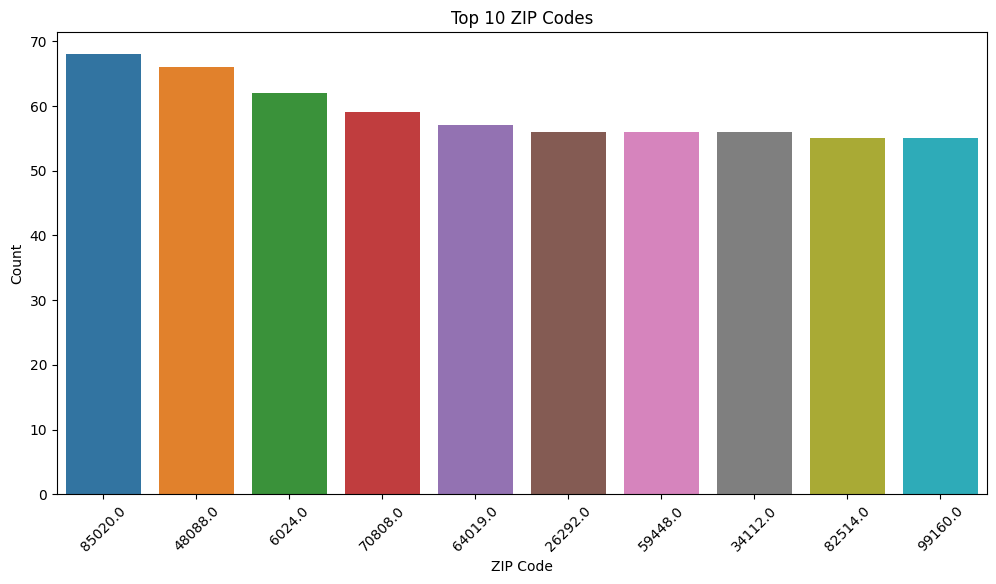

In [5]:
# Count plot of 'zip' with the top 10 ZIP codes
top_zip_codes = train_df['zip'].value_counts().head(10).index
plt.figure(figsize=(12, 6))
sns.countplot(x='zip', data=train_df[train_df['zip'].isin(top_zip_codes)], order=top_zip_codes)
plt.title('Top 10 ZIP Codes')
plt.xlabel('ZIP Code')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

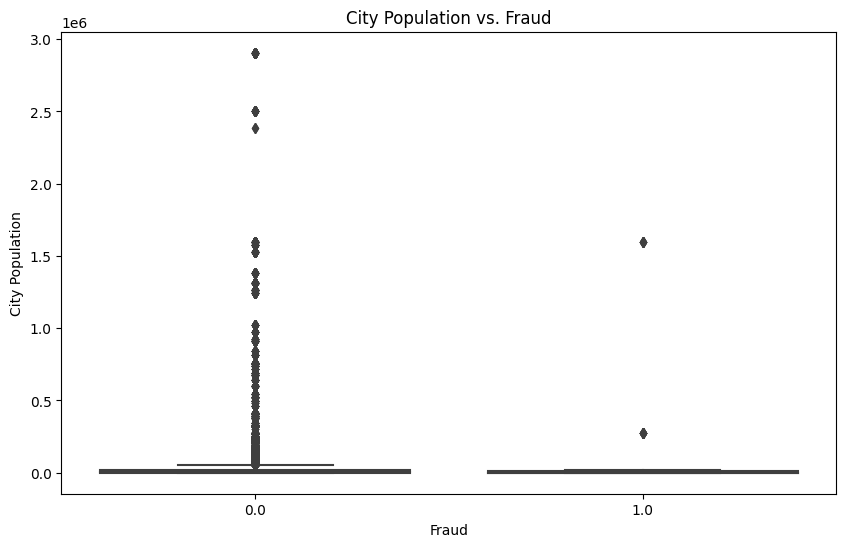

In [6]:
# Box plot of 'city_pop' with 'is_fraud' as hue
plt.figure(figsize=(10, 6))
sns.boxplot(x='is_fraud', y='city_pop', data=train_df)
plt.title('City Population vs. Fraud')
plt.xlabel('Fraud')
plt.ylabel('City Population')
plt.show()

<ipython-input-7-9c1822a0d4c5>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = train_df.corr()


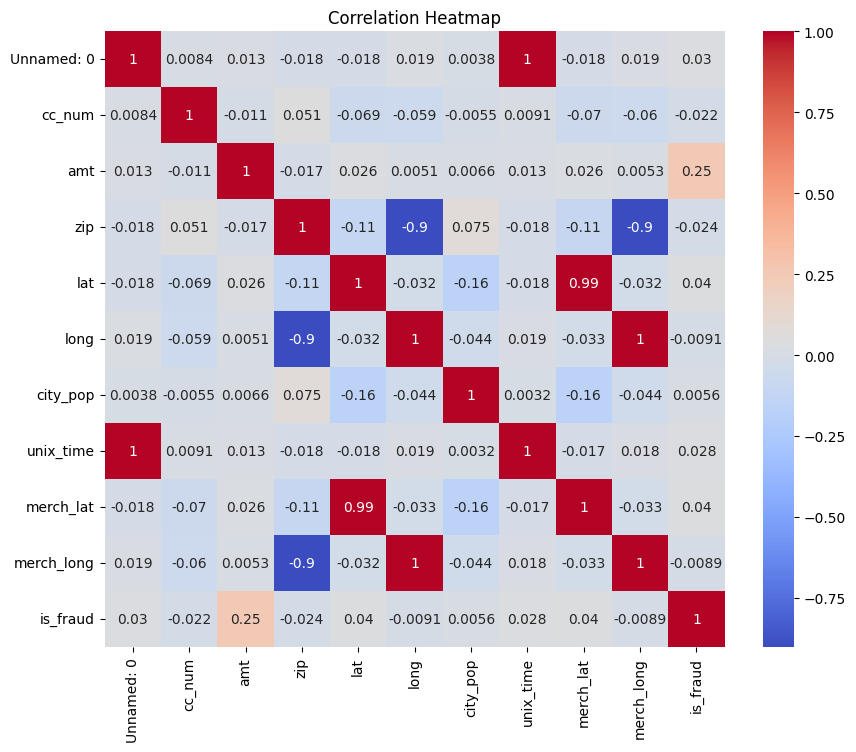

In [7]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = train_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [8]:
# Remove rows with missing values
df_cleaned = train_df.dropna()

# Display the DataFrame without missing values
print(df_cleaned)

       Unnamed: 0 trans_date_trans_time        cc_num  \
0               0   2019-01-01 00:00:18  2.703186e+15   
1               1   2019-01-01 00:00:44  6.304233e+11   
2               2   2019-01-01 00:00:51  3.885949e+13   
3               3   2019-01-01 00:01:16  3.534094e+15   
4               4   2019-01-01 00:03:06  3.755342e+14   
...           ...                   ...           ...   
19470       19470   2019-01-12 20:36:05  6.304714e+11   
19471       19471   2019-01-12 20:36:38  3.564839e+15   
19472       19472   2019-01-12 20:36:55  4.836999e+15   
19473       19473   2019-01-12 20:37:04  3.050162e+13   
19474       19474   2019-01-12 20:38:55  5.456713e+15   

                                  merchant        category     amt      first  \
0               fraud_Rippin, Kub and Mann        misc_net    4.97   Jennifer   
1          fraud_Heller, Gutmann and Zieme     grocery_pos  107.23  Stephanie   
2                     fraud_Lind-Buckridge   entertainment  220.11     E

In [9]:
features = ['amt', 'zip', 'lat', 'long', 'city_pop', 'unix_time', 'merch_lat', 'merch_long'  , 'is_fraud']
X = df_cleaned[features]

In [10]:
pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.4/484.4 kB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.4/153.4 kB 18.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.8/81.8 kB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 14.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 15.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.5/17.5 MB 92.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 95.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 95.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 76.0 MB/s eta 0

In [11]:
from pycaret.classification import *


In [12]:
clas1 = setup(data = X ,target = 'is_fraud')

,Description,Value
0,Session id,8574
1,Target,is_fraud
2,Target type,Binary
3,Original data shape,"(19475, 9)"
4,Transformed data shape,"(19475, 9)"
5,Transformed train set shape,"(13632, 9)"
6,Transformed test set shape,"(5843, 9)"
7,Numeric features,8
8,Preprocess,True
9,Imputation type,simple


In [13]:
# compare baseline models
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9979,0.9928,0.7278,0.9607,0.8236,0.8226,0.8329,0.8470
xgboost,Extreme Gradient Boosting,0.9977,0.9854,0.7411,0.9081,0.8122,0.8111,0.8173,0.9550
lightgbm,Light Gradient Boosting Machine,0.9975,0.9882,0.7311,0.8877,0.7940,0.7927,0.8004,1.1030
rf,Random Forest Classifier,0.9960,0.9813,0.5100,0.8492,0.6187,0.6169,0.6453,2.6740
ada,Ada Boost Classifier,0.9956,0.9414,0.4689,0.8132,0.5803,0.5784,0.6066,0.8920
gbc,Gradient Boosting Classifier,0.9946,0.9571,0.5222,0.6202,0.5601,0.5575,0.5630,2.5860
dt,Decision Tree Classifier,0.9935,0.7909,0.5856,0.5130,0.5407,0.5374,0.5417,0.2270
lr,Logistic Regression,0.9933,0.5175,0.0000,0.0000,0.0000,0.0000,0.0000,0.5720
svm,SVM - Linear Kernel,0.9933,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.2990
dummy,Dummy Classifier,0.9933,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0590


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

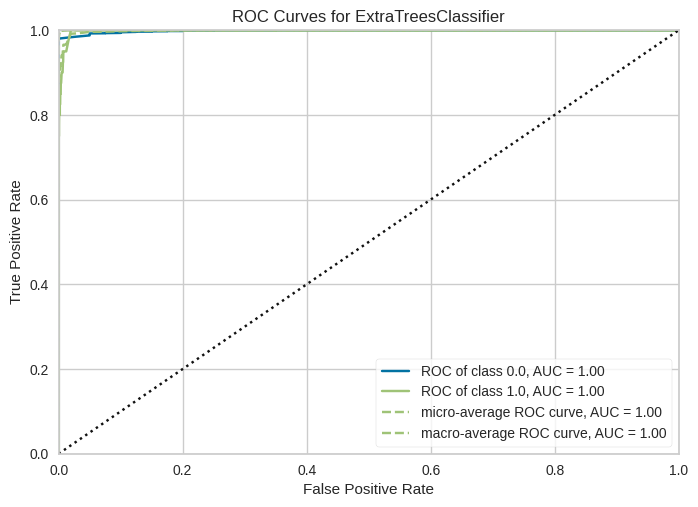

In [14]:
plot_model(best, plot='auc')

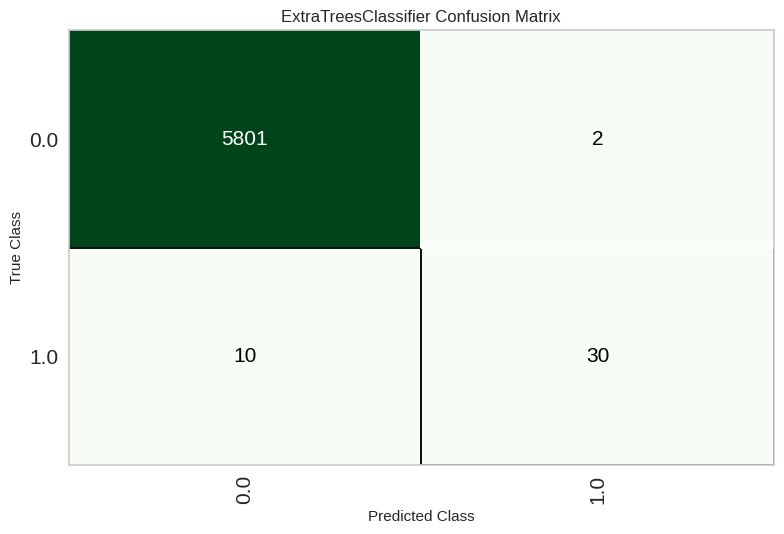

In [15]:
plot_model(best, plot='confusion_matrix')

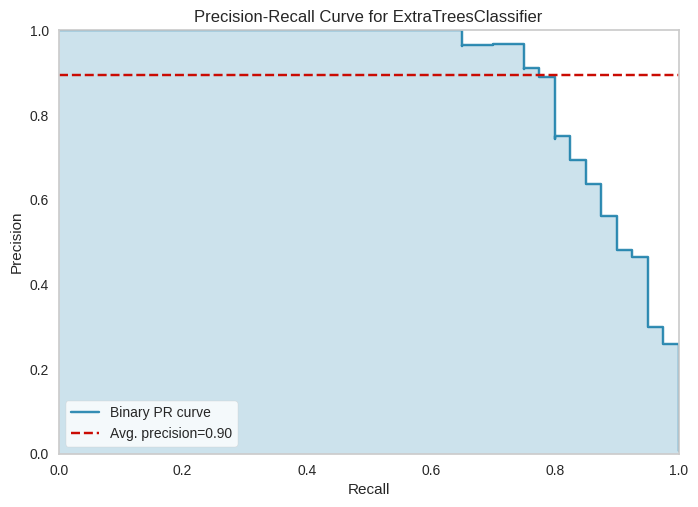

In [16]:
plot_model(best, plot='pr')

In [17]:
test_df.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     1
state                    1
zip                      1
lat                      1
long                     1
city_pop                 1
job                      1
dob                      1
trans_num                1
unix_time                1
merch_lat                1
merch_long               1
is_fraud                 1
dtype: int64

In [ ]:
# Remove rows with missing values
df_cleaned1 = test_df.dropna()

# Display the DataFrame without missing values
print(df_cleaned1)

In [19]:
features1 = ['amt', 'zip', 'lat', 'long', 'city_pop', 'unix_time', 'merch_lat', 'merch_long'  , 'is_fraud']
X1 = df_cleaned1[features1]

In [20]:
from pycaret.classification import predict_model

# Assuming your target column in the test_df is named 'target_column_name'
predictions = predict_model(best, data=X1)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.9947,0.8554,0.0000,0.0000,0.0000,-0.0024,-0.0025


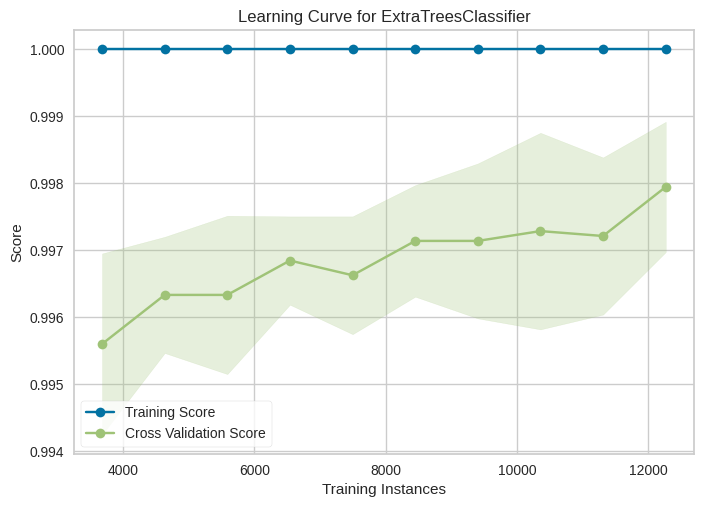

In [21]:
plot_model(best, plot='learning')